**2021 Airbnb Data for NYC**

In [96]:
# Dataset from https://www.kaggle.com/sarthakniwate13/air-bnb-nyc-data

import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(14.7,8)})

## Part I: Business Understanding

Airbnb is a platform where users can rent out their properties to potentially anyone. This has made it convinent for those traveling or looking for a place to stay for a short time. So we want to know what kind of prices can we expect from different kinds of properties in NYC. We also want to take a look at the other side and see which properties are most demanded.

**Questions Trying to answer:**
  1. What kind of properties are rented out the most? 
  2. Which borough has the most profitable property listings?
  3. What is a fair price for an airbnb in NYC?
  4. What are the most appealing airbnb listings?


In [97]:
# Reading from csv

df = pd.read_csv("Airbnb_NYC.csv")

## Part II: Preparing and Cleaning Data

In [98]:
# Dropping missing data or duplicate data that has no prices associated with the airbnb listing
df = df.dropna()
df = df.drop_duplicates()

## Part III: Data Understanding

In [99]:
boroughs = df["Boroughs"].unique()
prop_types = df["Prop_Type"].unique()

# Dropping longitude and latitude since they are features we don't want to explorate at the moment
df = df.drop(labels=["Longitude", "Latitude"], axis=1)
df.describe()

,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
count,38331.000000,38331.000000,38331.000000,38331.000000,38331.000000,38331.000000
mean,5.434870,2.988391,112.567269,29.750124,1.368474,140.017427
std,10.744948,8.417665,129.450084,48.834928,1.698237,194.836510
min,1.000000,1.000000,0.000000,1.000000,0.010000,10.000000
25%,1.000000,1.000000,0.000000,3.000000,0.190000,68.000000
50%,2.000000,1.000000,48.000000,10.000000,0.710000,100.000000
75%,4.000000,2.000000,228.000000,34.000000,2.010000,165.000000
max,300.000000,96.000000,365.000000,639.000000,66.610000,10000.000000


### Correlation Matrix

Looking at Min_Nights and Host_Listing_Cnt we can see there is a weak correlation in that the higher the minimum nights the higher the host listing count. Suggesting if you want people to airbnb your listing you should set a lower minimum nights. Also looking at the days available there is a weak correlation suggesting that property listing are more likely to be available for longer if the minimum nights are higher.

We can take a look at which boroughs and property types have lower min nights listed and host listing counts as well as less available.


<AxesSubplot:>

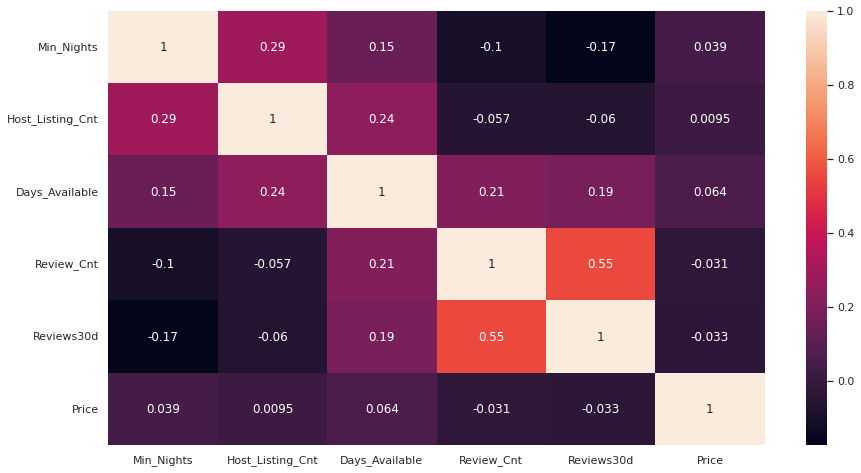

In [100]:


sns.heatmap(df.corr(), annot=True)

### Q1:  What kind of properties are rented out the most? 

From the pie chart enitre homes (52%) and private rooms (46%) make majority of the airbnb listings however that doesn't necessarily mean that those are the most demanded. For that we can use the descriptive statistics and the scatter plot to get a better understanding of what is happening. We will take a look at how reviews are effecting prices and how the listing availability is effected as price increases.  

<AxesSubplot:title={'center':'Property Types'}, ylabel='None'>

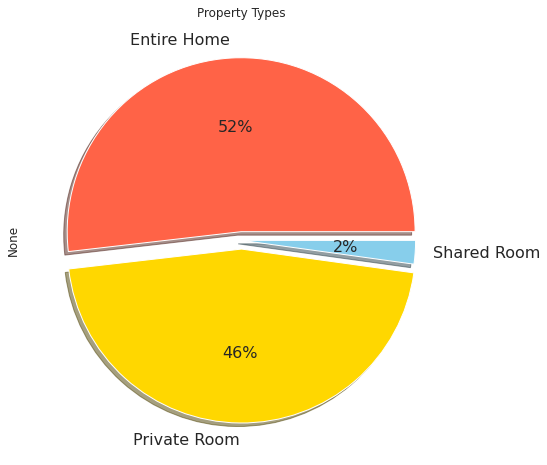

In [101]:
# Creates the labels for each category in Property Type
def label_function(val):
    return f'{val:.0f}%'

explode = (0.05, 0.05, 0)

# what percentage of listings are shared, private or entire homes
df.groupby('Prop_Type').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 16},
                                  colors=['tomato', 'gold', 'skyblue'], title="Property Types", labels=["Entire Home",  "Private Room", "Shared Room"], explode=explode, shadow=True)


### Scatter plot 
Analysis: We can see that the private room's reviews drops rather sharply as the price increas but the same doesn't apply to the entire home indicating that more people are willing to spend more money for an entire home which makes sense. So we can say that there is more demand for entire homes when the price range of a person is higher since they are willing to pay more for an entire home infact almost double the median price of a private room for an entire home listing.  

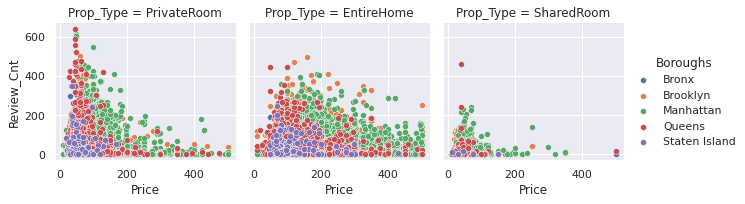

In [102]:
# Most of the reviews are around the price point of the median price for private rooms of 75
g = sns.FacetGrid(df[(df['Price'] <= 500)], col="Prop_Type", hue="Boroughs")
g.map(sns.scatterplot, "Price", "Review_Cnt")
g.add_legend()

<AxesSubplot:xlabel='Price', ylabel='Reviews30d'>

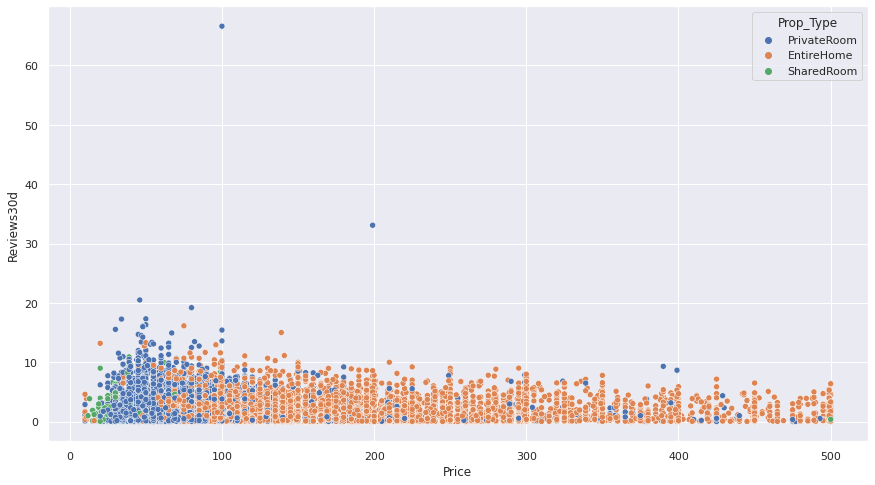

In [103]:
sns.scatterplot(data=df[df['Price'] <= 500], x="Price", y="Reviews30d", hue="Prop_Type")

There doesn't seem to be a clear relationship between the number of reviews and the price when looking at the scatter plots. However one thing is clear that the listings that are near the median price have more reviews than those that aren't. This makes sense since those are the properties that are mostly demanded.

<AxesSubplot:xlabel='Price', ylabel='Review_Cnt'>

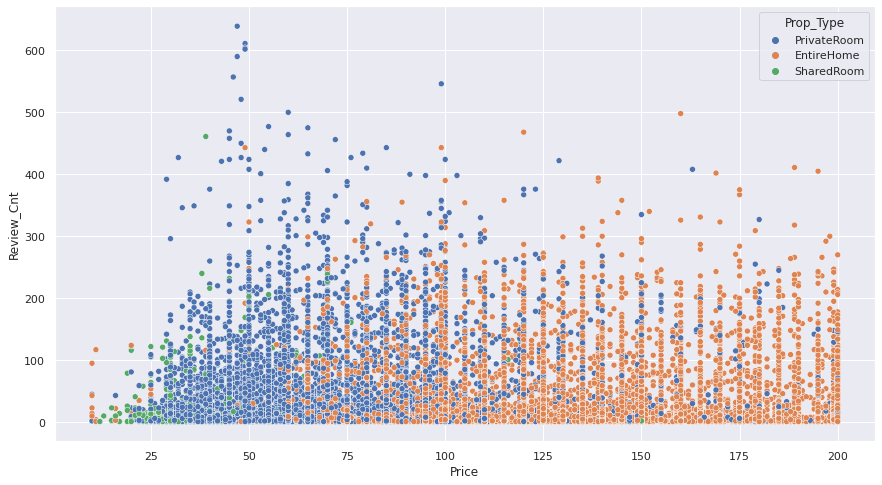

In [104]:
sns.scatterplot(data=df[df['Price'] <= 200], x="Price", y="Review_Cnt", hue="Prop_Type")

### Inferencial and Descriptive Statistics

Analysis: The summary statistics above show us some interesting facts we may want to know such as how long is an airbnb listed for based on the property type. Looking at the summary statistics we can say that the entirehome listings stay available for 39 days, the private home listing is available for 45 days and the shared home stays available for 150 days!


In [105]:
med_price_of_shared_room = df[df['Prop_Type'] == 'SharedRoom']['Price'].median()
med_price_of_private_room = df[df['Prop_Type'] == 'PrivateRoom']['Price'].median()
med_price_of_entire_house = df[df['Prop_Type'] == 'EntireHome']['Price'].median()

df[df['Prop_Type'] == 'SharedRoom'].describe()



,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
count,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000
mean,4.140811,4.840095,169.105012,23.491647,1.492947,63.109785
std,9.228118,6.292604,150.093538,39.170574,1.636828,95.722992
min,1.000000,1.000000,0.000000,1.000000,0.020000,10.000000
25%,1.000000,1.000000,5.000000,3.000000,0.280000,32.000000
50%,1.000000,3.000000,126.000000,9.000000,1.000000,45.000000
75%,3.000000,6.000000,342.000000,25.000000,2.097500,69.000000
max,100.000000,36.000000,365.000000,461.000000,10.900000,1800.000000


In [106]:
df[df['Prop_Type'] == 'PrivateRoom'].describe()

,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
count,17627.000000,17627.000000,17627.000000,17627.000000,17627.000000,17627.000000
mean,4.271118,2.609463,114.612753,30.846996,1.437912,84.000000
std,9.302869,4.401497,131.147926,52.019606,1.837071,146.572673
min,1.000000,1.000000,0.000000,1.000000,0.010000,10.000000
25%,1.000000,1.000000,0.000000,3.000000,0.200000,50.000000
50%,2.000000,1.000000,53.000000,10.000000,0.770000,70.000000
75%,3.000000,3.000000,227.000000,35.000000,2.070000,92.000000
max,300.000000,96.000000,365.000000,639.000000,66.610000,10000.000000


In [107]:
df[df['Prop_Type'] == 'EntireHome'].describe()

,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
count,19866.000000,19866.000000,19866.000000,19866.000000,19866.000000,19866.000000
mean,6.522048,3.246502,108.367412,29.040874,1.301612,192.965569
std,11.829608,10.840839,126.360923,46.181334,1.564617,219.000916
min,1.000000,1.000000,0.000000,1.000000,0.010000,10.000000
25%,2.000000,1.000000,0.000000,3.000000,0.180000,115.000000
50%,3.000000,1.000000,39.000000,9.000000,0.640000,150.000000
75%,5.000000,1.000000,224.000000,33.000000,2.000000,210.000000
max,265.000000,96.000000,365.000000,498.000000,16.130000,10000.000000


### Q3: What is a fair price for an airbnb listing in nyc?
The below box and whiskers plot shows that entire homes go for around 150, private rooms are 75 and shared rooms at 45. We can also see that entire homes have more standard deviation than the other two types of properties.

Analysis: The entire homes have the highest median prices out of the rest of the properties. Here we are looking at median prices and NOT the average since the average may skew our data since there might be some property listings that are highly priced skewing the average. Thus we use the median to find the most common price for each of the property type.

A note about the standard deviations:
There is a lot more variance for the entire home property listing suggesting that the prices are way more flexible and people may tend to be more likely to spend more on enitre homes. While the shared room and private rooms standard deviation is lower.

<AxesSubplot:xlabel='Prop_Type', ylabel='Price'>

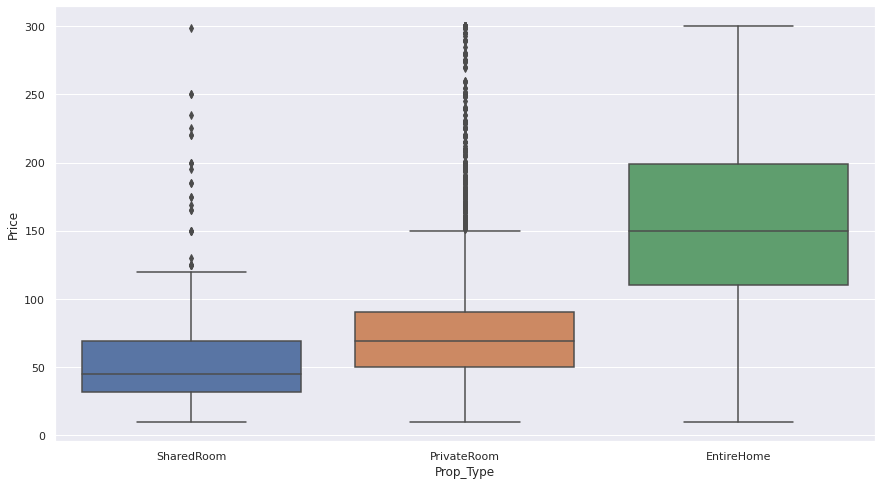

In [108]:
sns.boxplot(data=df[df['Price'] <= 300], x="Prop_Type", y="Price", order=["SharedRoom", "PrivateRoom", "EntireHome"])

## Q2: Which borough has the most profitable property listings?

In order to further look at which property listings are the most profitable we group by boroughs. The following visualization below tells us the median price point of airbnb listings in its respective borough.

Analysis: 

<AxesSubplot:xlabel='Boroughs', ylabel='Price'>

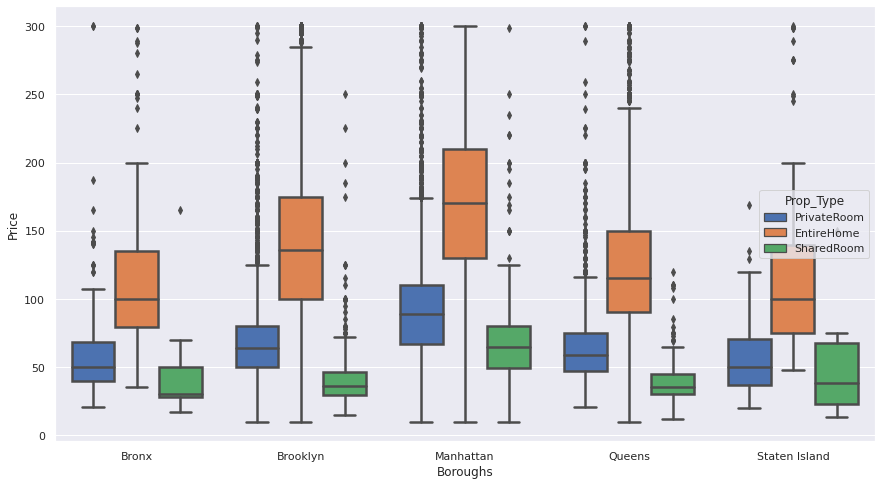

In [109]:

# T
sns.boxplot(data=df[df['Price'] <= 300], x="Boroughs", y="Price", hue="Prop_Type", linewidth=2.5, saturation=1)

## Evaluation

### Q1: What kind of properties are available and are most demanded?
The most demanded properties are entire houses and people are willing to pay more for them as seen by the higher standard deviation suggests. We also know that from the summary statistics and pie chart that 52% of the listings are entire houses and that typically they go for $150.

### Q2: What is a fair price for an airbnb in NYC?
If using the median price as a fair price point then we would say it varies depending on the borough but typically 150, 75, 45 for entire home, private room and shared room respectively.

### Q3: How to list an airbnb to make it most appealing?
Looking at the review scatter plots we can see that most of the reviews come from listings that fall in the median price point so we can say that those are the most popular and most demanded. So if seeking to list a property the entire home is the most likely to be rented out the quickest with the lowest availability out of the other property types.